In [12]:
import numpy as np
import cvxpy as cp
import scipy as sc
import sys
import pennylane as qml
import torch
import torch.nn as nn
import torch.nn.functional as Fn
import torch.optim as optim
from torch.autograd import Variable

In [13]:
# measured relative ent plots Case 1
with open("log_cost_func_meas_rel_ent_no_nn_1.npy", 'rb') as f:
    cfs_no_nn_1 = np.load(f)

In [14]:
with open("log_cost_func_meas_rel_ent_nn_1.npy", 'rb') as f:
    cfs_nn_1 = np.load(f)

In [15]:
temp_list_nn = cfs_nn_1.copy()
# Apply rolling mean to smooth out the convergence
rolling_mean = []
for i in range(len(temp_list_nn)):
    window_size = 5  # Adjust the window size based on your preference
    rolling_mean.append(np.convolve(temp_list_nn[i], np.ones(window_size), 'valid') / window_size)
    
x = np.arange(window_size, len(temp_list_nn[0]) + 1)

In [16]:
temp_list_no_nn = cfs_no_nn_1.copy()
# Apply rolling mean to smooth out the convergence
rolling_mean_no_nn = []
for i in range(len(temp_list_no_nn)):
    window_size = 20  # Adjust the window size based on your preference
    rolling_mean_no_nn.append(np.convolve(temp_list_no_nn[i], np.ones(window_size), 'valid') / window_size)
    
x = np.arange(window_size, len(temp_list_no_nn[0]) + 1)

/var/folders/r5/w2z39yyd4jz09754wfkwn14w0000gn/T/ipykernel_14947/4222730572.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


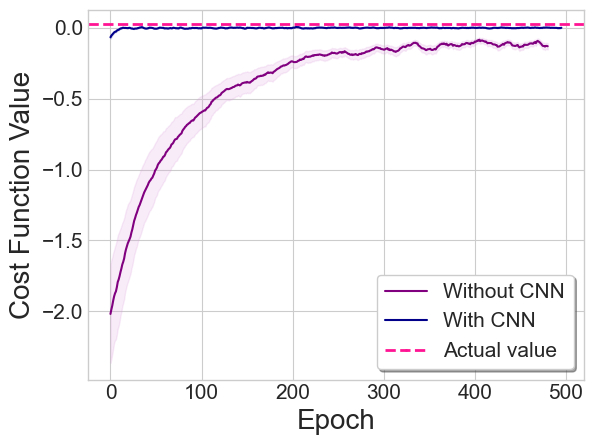

In [17]:
import sys
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": False
})

# Set the style of the plot
plt.style.use('seaborn-whitegrid')

# Set the size of the figure
fig, ax = plt.subplots()



mean = np.mean(rolling_mean_no_nn, axis=0)
st_dev = np.std(rolling_mean_no_nn, axis=0)
mean_nn = np.mean(rolling_mean, axis=0)
st_dev_nn = np.std(rolling_mean, axis=0)


# Plot the data and customize the appearance
ax.plot(mean, linewidth=1.5, color='purple', label='Without CNN')
ax.fill_between(range(len(rolling_mean_no_nn[0])), mean-st_dev, mean+st_dev, alpha=0.2, color='plum')

ax.plot(mean_nn, linewidth=1.5, color='darkblue', label='With CNN')
ax.fill_between(range(len(rolling_mean[0])), mean_nn-st_dev_nn, mean_nn+st_dev_nn, alpha=0.15, color='darkblue')

ax.axhline(y=0.03, marker='o', markersize=1, linestyle='--', linewidth=2, color='deeppink', label='Actual value')

# Add a title and axis labels
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Cost Function Value', fontsize=20)

# Set the font size of the tick labels on the x and y axes
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add a legend
legend = ax.legend(loc='lower right', fontsize=15, frameon=True, shadow=True)
frame = legend.get_frame()
# frame.set_facecolor('white')
frame.set_alpha(1)


# Save the plot as a high-resolution PNG image and display it
# plt.savefig('my_beautiful_plot_renyi.png', dpi=300)
plt.savefig("plot_meas_rel_1_final.pdf", format="pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()


In [18]:
# Save the results in a file
with open('log_cost_func_meas_rel_no_nn_1_final.npy', 'wb') as f:
    np.save(f, temp_list_no_nn, allow_pickle=True)

In [19]:
# Save the results in a file
with open('log_cost_func_meas_rel_nn_1_final.npy', 'wb') as f:
    np.save(f, temp_list_nn, allow_pickle=True)

In [18]:
# measured relative ent plots Case 2
with open("log_cost_func_meas_rel_no_nn_2.npy", 'rb') as f:
    cfs_no_nn_1 = np.load(f)

In [19]:
with open("log_cost_func_meas_rel_nn_2.npy", 'rb') as f:
    cfs_nn_1 = np.load(f)

In [20]:
temp_list_nn = cfs_nn_1.copy()
# Apply rolling mean to smooth out the convergence
rolling_mean = []
for i in range(len(temp_list_nn)):
    window_size = 30  # Adjust the window size based on your preference
    rolling_mean.append(np.convolve(temp_list_nn[i], np.ones(window_size), 'valid') / window_size)
    
x = np.arange(window_size, len(temp_list_nn[0]) + 1)

In [21]:
temp_list_no_nn = cfs_no_nn_1.copy()
# Apply rolling mean to smooth out the convergence
rolling_mean_no_nn = []
for i in range(len(temp_list_no_nn)):
    window_size = 30  # Adjust the window size based on your preference
    rolling_mean_no_nn.append(np.convolve(temp_list_no_nn[i], np.ones(window_size), 'valid') / window_size)
    
x = np.arange(window_size, len(temp_list_no_nn[0]) + 1)

/var/folders/r5/w2z39yyd4jz09754wfkwn14w0000gn/T/ipykernel_14947/2579306505.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


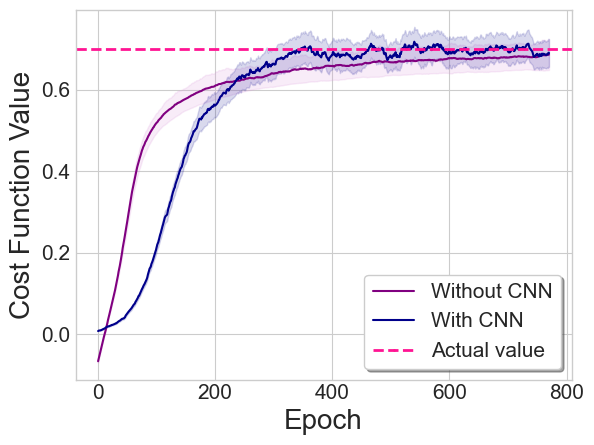

In [22]:
import sys
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": False
})

# Set the style of the plot
plt.style.use('seaborn-whitegrid')

# Set the size of the figure
fig, ax = plt.subplots()



mean = np.mean(rolling_mean_no_nn, axis=0)
st_dev = np.std(rolling_mean_no_nn, axis=0)
mean_nn = np.mean(rolling_mean, axis=0)
st_dev_nn = np.std(rolling_mean, axis=0)


# Plot the data and customize the appearance
ax.plot(mean, linewidth=1.5, color='purple', label='Without CNN')
ax.fill_between(range(len(rolling_mean_no_nn[0])), mean-st_dev, mean+st_dev, alpha=0.2, color='plum')

ax.plot(mean_nn, linewidth=1.5, color='darkblue', label='With CNN')
ax.fill_between(range(len(rolling_mean[0])), mean_nn-st_dev_nn, mean_nn+st_dev_nn, alpha=0.15, color='darkblue')

ax.axhline(y=0.70, marker='o', markersize=1, linestyle='--', linewidth=2, color='deeppink', label='Actual value')

# Add a title and axis labels
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Cost Function Value', fontsize=20)

# Set the font size of the tick labels on the x and y axes
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add a legend
legend = ax.legend(loc='lower right', fontsize=15, frameon=True, shadow=True)
frame = legend.get_frame()
# frame.set_facecolor('white')
frame.set_alpha(1)


# Save the plot as a high-resolution PNG image and display it
# plt.savefig('my_beautiful_plot_renyi.png', dpi=300)
plt.savefig("plot_meas_rel_2_final.pdf", format="pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()


In [15]:
# Save the results in a file
with open('log_cost_func_meas_rel_no_nn_2_final.npy', 'wb') as f:
    np.save(f, temp_list_no_nn, allow_pickle=True)

# Save the results in a file
with open('log_cost_func_meas_rel_nn_2_final.npy', 'wb') as f:
    np.save(f, temp_list_nn, allow_pickle=True)